## Machine Learning Lab Practical 6  (20/09/2024)

ชื่อ นายฉัตรดนัย ปูทอง

รหัสนักศึกษา 116510462029-9

e-mail earthtyjoy11@gmail.com

# 1. พื้นฐาน Convolutional Neural Network (CNN)

ในการทดลองนี้ นศ. จะได้ทำความเข้าใจพื้นฐานการทำงานของ CNN และ Pooling


ตัวอย่าง lab อ้างอิงจาก [Reference 1](https://developers.google.com/codelabs/tensorflow-3-convolutions)

1.1 inport library และโหลดข้อมูลภาพตัวอย่าง

ภาพตัวอย่างมีขนาด 512x512 pixels

In [ ]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()
i.shape

<ipython-input-8-1bb815916830>:4: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  i = misc.ascent()


(512, 512)

1.2 แสดงตัวอย่างภาพที่ใช้ในโปรแกรม

ตัวอย่างเป็นภาพปล่องบันได ซึ่งแสดงถึง features ที่หลากหลาย (แสดงเส้นขอบในแนวตั้ง แนวนอน และมุมต่างๆ)

ทั้งนี้ จากภาพจะเห็นลักษณะของเส้นของในแนวตั้ง (vertical line) เป็นจำนวนมาก

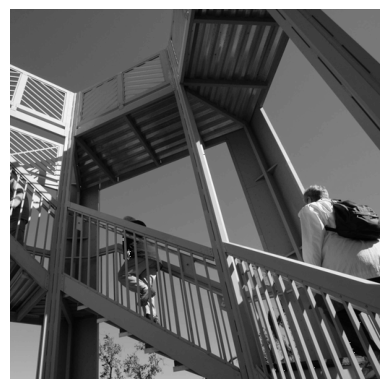

In [ ]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

1.3 copy image array

ภาพดังกล่าวถูกเก็บอยู่ในตัวแปร numpy array ซึ่งเราสามารถ copy ค่าเก็บไว้ และ transform ในรูปแบบที่ใช้งานได้สะดวกได้ในภายหลัง


size_x = 512, size_y = 512


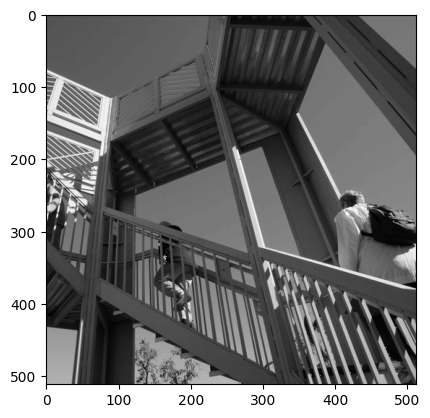

In [ ]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

print(f"size_x = {size_x}, size_y = {size_y}")

# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
# plt.grid(True)
plt.imshow(i_transformed)
# plt.axis('off')
plt.show()

1.4 สร้าง fllter ด้วยตัวแปร arry ขนาด 3x3

*   หมายเหตุ code ในส่วนนี้จะมี filter อยู่ 3 ตัว โดยจะให้ทดลองใช้งาน filter ทีละตัวเพื่อดูข้อแตกต่างของผลลัพธ์
*   อ่านเพิ่มเติมเกี่ยวกับ filter ใน image processing [ที่นี่](https://en.wikipedia.org/wiki/Kernel_(image_processing))

In [ ]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
#filter = [ [-1, -2,  -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# More filters
#filter = [ [-1, -1, -1], [-1, 4, -1], [-1, -1, -1]]

# If all the digits in the filter don't add up to 0 or 1, you
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1


1.5 Create the convolution

สร้าง convolution โดยการนำ filter มาคูณทุก pixels ในภาพตัวอย่าง ทั้งนี้ให้เว้นขอบ (margin) 1 pixcel รอบ ๆ รูปภาพ

อ่านรายละเอียดได้จาก [ที่นี่ ](https://developers.google.com/codelabs/tensorflow-3-convolutions#3) และ [ที่นี่](https://developers.google.com/codelabs/tensorflow-3-convolutions#4)


In [ ]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

1.6 แสดงภาพหลังจากคำนวณ convolution

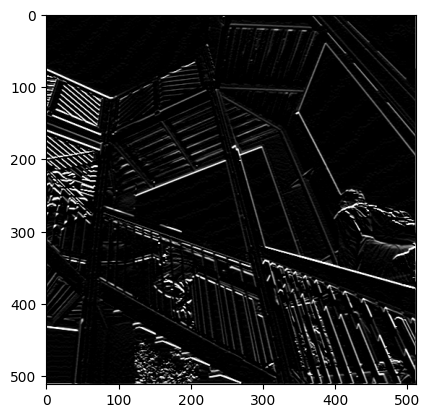

In [ ]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()

1.7 ทำความเข้าใจการทำ Pooling

Pooling เป็นเทคนิคสำคัญในการลดจำนวนข้อมูลในอินพุต (เช่น ลดจำนวน pixels ในภาพ) แต่ยังคงรักษาข้อมูลหรือ features ที่สำคัญไว้ในรูปภาพ

ในตัวอย่างนี้จะเลือกใช้เทคนิคที่เรียกว่า MaxPooling ซึ่งจะเลือก pixel ที่มีค่า convolution สูงที่สุดจากกรอบ pixels ที่พิจารณา

อ่านรายละเอียดได้จาก [ที่นี่](https://developers.google.com/codelabs/tensorflow-3-convolutions#5)


จากผลลัพธ์จะสังเกตว่าจะได้ภาพแบบเดิมจะจะมีขนาดเล็กลงเหลือ 25%

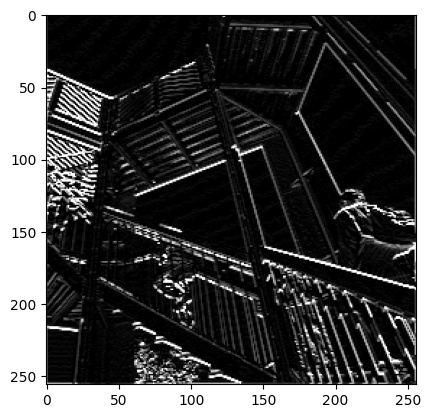

In [ ]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()


# 2. ทดลองสร้างโมเดล Convolutional Neural Network (CNN)

ในการทดลองนี้ นศ. จะได้สร้าง Deep Neural Network ด้วยเทคนิค CNN


ตัวอย่าง lab อ้างอิงจาก [Reference 1](https://developers.google.com/codelabs/tensorflow-4-cnns#0)

2.1 ทดลองรันโมเดล multi-class classification พื้นฐานที่ใช้งานเฉพาะ Dense Layer และอ่านค่า accuracy


In [ ]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.summary()
test_metrics = model.evaluate(test_images, test_labels)
print(f"evaluation={test_metrics}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7776 - loss: 0.6282
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8609 - loss: 0.3838
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8757 - loss: 0.3394
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8867 - loss: 0.3094
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8914 - loss: 0.2951


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (32, 784)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 128)                   │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 10)                    │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8792 - loss: 0.3483
evaluation=[0.3447491526603699, 0.8788999915122986]


2.2 ให้บันทึกค่า testing accuracy ที่นี่...

```
# accuracy = 87%
```

2.3 ตัวอย่างโมเดล CNN

ให้รันโมเดลและอ่านค่า accuracy

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(training_images, training_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"test_loss={test_loss}, accuracy = {test_acc}")


2.17.0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.7809 - loss: 0.6056
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 44ms/step - accuracy: 0.8871 - loss: 0.3056
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 44ms/step - accuracy: 0.9064 - loss: 0.2503
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 44ms/step - accuracy: 0.9180 - loss: 0.2166
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 151s 49ms/step - accuracy: 0.9289 - loss: 0.1884
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9005 - loss: 0.2670
test_loss=0.261083722114563, accuracy = 0.9017000198364258


2.4 แสดงตัวอย่างคำตอบ 100 ลำดับแรกของข้อมูลทดสอบ

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


2.4 แสดงภาพผลลัพธ์จากการทำ Convolution และ Pooling

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


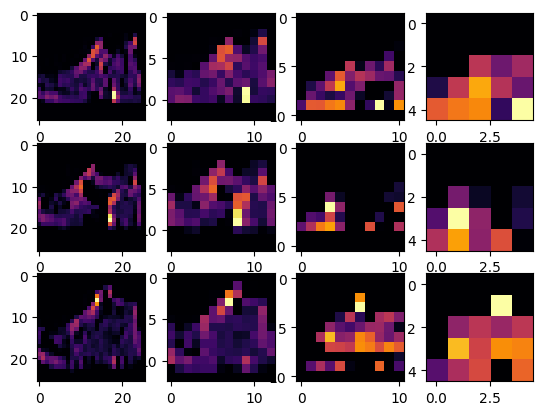

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)

# เลือกภาพจากข้อมูลทดสอบที่จะนำมาแสดงผล
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6


# ดึง layer ภายในโมเดลออกมาใช้งาน
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.inputs, outputs = layer_outputs)

# คำนวณผลในแต่ละ layer (layer 0-3 หรือ Convlution layer และ Pooling Layer) และแสดงภาพผลลัพธ์
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

2.5 ทดลองเปลี่ยน Runtime เป็น GPU แล้วสังเกตุเวลาในการ train model และบันทึกค่าในข้อ 2.6

In [ ]:
import tensorflow as tf
print(tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(training_images, training_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"test_loss={test_loss}, accuracy = {test_acc}")


2.17.0


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 45ms/step - accuracy: 0.7778 - loss: 0.6193
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8899 - loss: 0.3003
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 145s 46ms/step - accuracy: 0.9051 - loss: 0.2526
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 44ms/step - accuracy: 0.9207 - loss: 0.2141
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 45ms/step - accuracy: 0.9294 - loss: 0.1872
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9009 - loss: 0.2814
test_loss=0.2737557590007782, accuracy = 0.8995000123977661


2.6 บันทึกค่าเวลาที่อ่านได้จากข้อ 2.5 และเปรียบเทียบกับเวลาที่อ่านได้จากข้อ 2.3



```
# บันทึกเวลาและเปรียบเทียบ
 - บันทึกเวลาที่ได้
epoch 1/5 : 105 s
epoch 2/5 : 100 s
epoch 3/5 : 97 s
epoch 4/5 : 96 s
epoch 5/5 : 100 s
-----------------------------------------
- เทียบกับข้อ 2.3
            2.3  | 2.5         
epoch 1/5 : 103  | 105
epoch 2/5 : 144  | 100
epoch 3/5 : 139  | 97
epoch 4/5 : 141  | 96
epoch 5/5 : 143  | 100
```



2.7 ทดลองแก้ไขจำนวน neuron ใน Convolution layer แรกจาก 64 เป็น 32 และสังเกตค่า accuracy และเวลาในการ train model


In [ ]:
import tensorflow as tf
print(tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(training_images, training_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"test_loss={test_loss}, accuracy = {test_acc}")


2.17.0


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.7653 - loss: 0.6567
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.8817 - loss: 0.3300
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.8961 - loss: 0.2795
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9079 - loss: 0.2485
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9156 - loss: 0.2260
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8996 - loss: 0.2835
test_loss=0.2728888690471649, accuracy = 0.9014999866485596


2.8 อธิบายผลที่สังเกตุได้ในข้อ 2.7



```
หลังจากทำการ train model เรียบร้อยแล้วจะเห็นได้ว่า มีการใช้เวลาที่น้อยลงมาก เนื่องจากเป็นการลดจำนวน neuron ลง

ในด้านของค่าความแม่นยำมีความใกล้เคียงกัน
```



2.9 ทดลองแก้ไขจำนวน neuron ใน Convolution layer แรกจาก 64 เป็น 128 และสังเกตค่า accuracy และเวลาในการ train model

---




In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(training_images, training_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"test_loss={test_loss}, accuracy = {test_acc}")


2.17.0


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 559,882 (2.14 MB)

 Trainable params: 559,882 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 226s 120ms/step - accuracy: 0.7834 - loss: 0.5915
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 263s 120ms/step - accuracy: 0.8900 - loss: 0.2970
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 219s 117ms/step - accuracy: 0.9131 - loss: 0.2366
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 261s 116ms/step - accuracy: 0.9265 - loss: 0.2028
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 264s 117ms/step - accuracy: 0.9352 - loss: 0.1745
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9125 - loss: 0.2579
test_loss=0.25160959362983704, accuracy = 0.9107999801635742


2.10 อธิบายผลที่สังเกตุได้ในข้อ 2.9



```
ในด้านของเวลาที่ใช้ในการ train model ใช้เวลาค่อนข้างเยอะในแต่ละรอบ
เมื่อเทียบกับการใช้จำนวน neuron เป็น 64 จะใช้เวลาเพิ่มขึ้นเป็น 2-3 เท่า

และในด้านของค่าความแม่นยำ ถือว่ามีความแม่นยำมากชึ้น
```

